<a href="https://colab.research.google.com/github/450fausto/DatosPyE/blob/main/Pareto_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/450fausto/DatosPyE/main/Comcast%20Telecom%20Complaints%20Dataset/Comcast.csv")

In [2]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


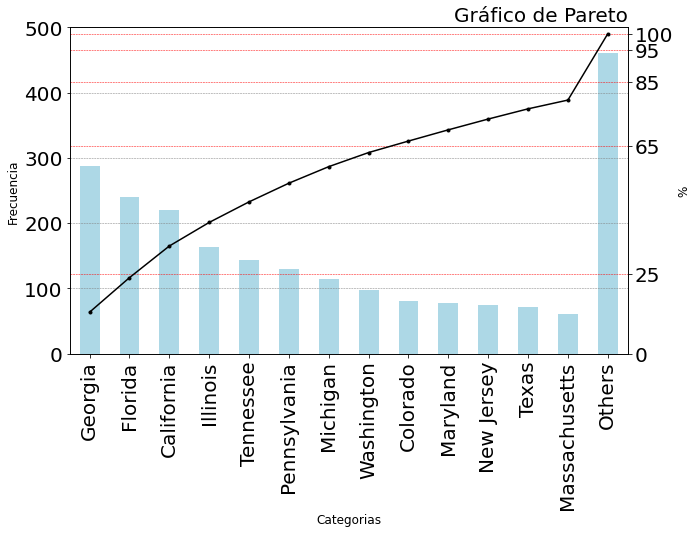

In [23]:
columna_interes='State'
columna_referencia='Time'
limite = 80

sub_df=df.groupby([columna_interes]).count().reset_index().sort_values(by=[columna_referencia], ascending=False)
sub_df['percent_acc']=100*sub_df[columna_referencia].cumsum()/sub_df[columna_referencia].sum()
if limite<100:
  total = sub_df[columna_referencia].sum()
  sub_df = sub_df.loc[sub_df['percent_acc']<=limite,:].reset_index()
  sub_df.loc[len(sub_df.index),[columna_interes, columna_referencia, 'percent_acc']]=['Others',total-sub_df[columna_referencia].sum(), 100]
################################################################################
# Bar Chart
ax=sub_df.plot(
                kind="bar", # Tipo de gráfico: bar chart
                x=columna_interes,
                y=columna_referencia, 
                legend="",  # Leyenda no necesaria para gráfico de barras
                color = 'lightblue', # Colores para las barras
                figsize=(10,6), # Tamaño (m,n) m: ancho, n: alto
                fontsize=20, #Tamaño de letra
                #ylim=(0,200), # Límite superior e inferior para el eje 'y'
                yticks=[0,100,200,300,400,500], # Líneas horizontales
                rot=90 # Inclinación de las etiquetas en grados
                )
ax.set_title('Gráfico de Pareto', # Título del gráfico
             fontsize=20, # Tamaño de letra del título
             loc='right') # Localización del título: 'left' 'center' 'right'
ax.set_xlabel('Categorias', fontsize=12) # Nombre del eje 'x' y tamaño de letra
ax.set_ylabel('Frecuencia', fontsize=12) # Nombre del eje 'x' y tamaño de letra

ax.grid(axis='y',          # Maya del eje 'y'
        color='gray',      # Color de la maya en eje 'y'
        linestyle='--',    # Estilo de línea
        linewidth=0.5)     # Ancho de línea

ax.grid(axis='x', linewidth=0) 
################################################################################          
ax1=ax.twinx()    # Agrega dos juegos de ejes

################################################################################
# Ojiva
ax2=sub_df.plot(
                kind="line", # Tipo de gráfico: line chart
                x=columna_interes,
                y='percent_acc', 
                style='.-', # Estilo: 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd' con '-', '--', '-.', ':'
                legend="",  # Leyenda no necesaria para la ojiva
                color = 'black', # Colores para la línea
                figsize=(10,6), # Tamaño (m,n) m: ancho, n: alto
                fontsize=20, #Tamaño de letra
                ylim=(0,102), # Límite superior e inferior para el eje 'y'
                yticks=[0,25,65,85,95,100], # Líneas horizontales
                rot=45, # Inclinación de las etiquetas en grados
                ax = ax1
                )

ax2.set_xlabel('Categorias', fontsize=12) # Nombre del eje 'x' y tamaño de letra
ax2.set_ylabel('%', fontsize=12) # Nombre del eje 'x' y tamaño de letra

ax2.grid(axis='y',          # Maya del eje 'y'
        color='red',      # Color de la maya en eje 'y'
        linestyle='--',    # Estilo de línea
        linewidth=0.5)     # Ancho de línea

ax2.grid(axis='x', linewidth=0.5)
################################################################################